# 1. Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

Matplotlib is building the font cache; this may take a moment.


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 1000)

In [3]:
df = pd.read_csv('final_scout_not_dummy.csv')
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


# 2. Exploratory Data Analysis and Visualization

**(EDA & DV)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.shape

(15915, 23)

In [6]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [7]:
df.duplicated().sum()

1673

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df["make_model"].value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

## Feature Engineering

Converting object to numeric 
(Comfort_Convenience, Entertainment_Media, Extras, Safety_Security)

In [11]:
df.head(2) 

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6


In [12]:
df["Comfort_Convenience"]

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15907    Air conditioning,Armrest,Automatic climate con...
15908    Air conditioning,Automatic climate control,Cru...
15909    Air conditioning,Armrest,Automatic climate con...
15911    Air conditioning,Automatic climate control,Cru...
15912    Air conditioning,Armrest,Automatic climate con...
Name: Comfort_Convenience, Length: 14242, dtype: object

In [13]:
df["Comfort_Convenience"].apply(lambda x : len(x.split(",")))

0        16
1         9
2        13
3        16
4        13
         ..
15907    27
15908    20
15909    26
15911    23
15912    24
Name: Comfort_Convenience, Length: 14242, dtype: int64

In [14]:
df["Comfort_Convenience"] = df["Comfort_Convenience"].apply(lambda x : len(x.split(",")))

In [17]:
df["Entertainment_Media"] = df["Entertainment_Media"].apply(lambda x : len(x.split(",")))

In [20]:
df["Safety_Security"] = df["Safety_Security"].apply(lambda x : len(x.split(",")))

In [21]:
df["Comfort_Convenience"].value_counts()

Comfort_Convenience
15    1012
17     973
14     960
16     846
13     787
4      779
11     731
6      714
12     690
10     676
7      650
5      621
18     578
8      566
3      552
9      495
19     436
21     389
20     366
23     301
22     291
2      249
1      168
24     126
25     105
26      80
27      44
28      31
29      14
31       4
30       4
32       2
33       2
Name: count, dtype: int64

In [22]:
df["Entertainment_Media"].value_counts()

Entertainment_Media
5     3187
6     2806
7     1757
4     1666
3     1411
2     1338
1     1222
8      670
9      171
10      14
Name: count, dtype: int64

In [23]:
df["Safety_Security"].value_counts()

Safety_Security
13    2201
14    1548
12    1540
11    1301
15     951
10     929
16     806
9      744
18     601
17     553
8      516
19     476
7      426
20     372
6      298
21     237
5      193
22     115
2       95
3       78
4       76
1       53
23      45
24      38
25      16
28      14
26      10
27       9
29       1
Name: count, dtype: int64

## Handling Outlier

In [28]:
df["make_model"].value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [29]:
df[df.make_model == "Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,15,7,Alloy wheels,15,1.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [30]:
df.drop(index = [2614], inplace = True)

In [31]:
df["make_model"].value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Name: count, dtype: int64

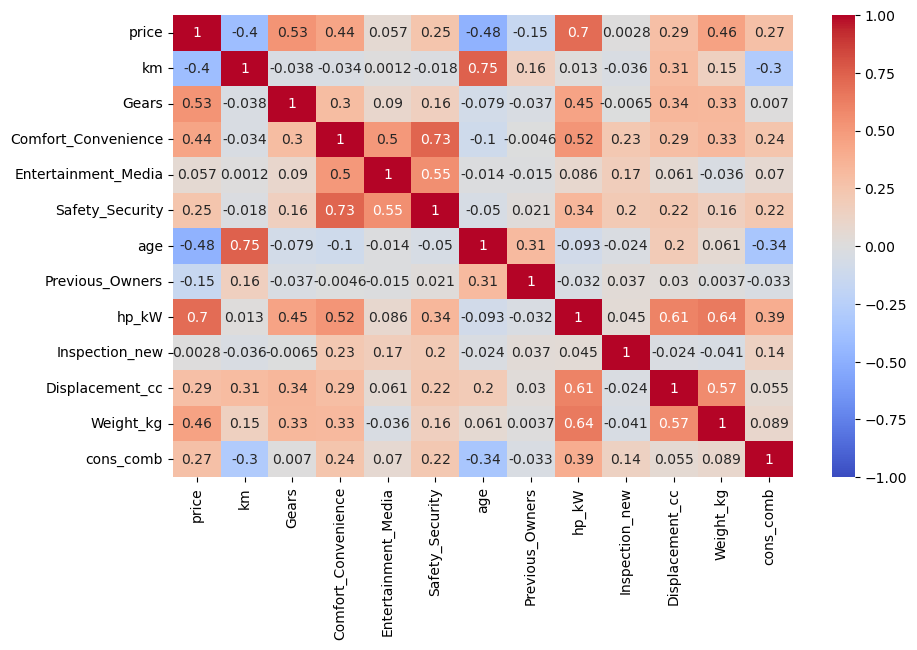

In [32]:
# for see the correlations

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="coolwarm");

# 3. Train | Test Split

In [38]:
columns = ["make_model", "Gears","Gearing_Type","age","km","hp_kW","Comfort_Convenience"]

In [39]:
X = df[columns]
y = df.price

In [72]:
X

,make_model,Gears,Gearing_Type,age,km,hp_kW,Comfort_Convenience
0,Audi A1,7.0,Automatic,3.0,56013.000000,66.0,16
1,Audi A1,7.0,Automatic,2.0,80000.000000,141.0,9
2,Audi A1,7.0,Automatic,3.0,83450.000000,85.0,13
3,Audi A1,6.0,Automatic,3.0,73000.000000,66.0,16
4,Audi A1,7.0,Automatic,3.0,16200.000000,66.0,13
...,...,...,...,...,...,...,...
15907,Renault Espace,6.0,Automatic,0.0,100.000000,118.0,27
15908,Renault Espace,6.0,Automatic,0.0,1647.362609,147.0,20
15909,Renault Espace,6.0,Automatic,0.0,1000.000000,165.0,26
15911,Renault Espace,7.0,Automatic,0.0,9900.000000,165.0,23


In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0)

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

## Converting Object Features into Numerical Features with Using Make Column Transformer

In [84]:
# converting object features into Numerical features. with 

cat_ordinal = X_train.select_dtypes("object").columns
cat_ordinal

Index(['make_model', 'Gearing_Type'], dtype='object')

In [85]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer(
    (ord_enc, cat_ordinal),
    remainder='passthrough',
    verbose_feature_names_out=False).set_output(transform="pandas")

# remainder: 
# Keep other columns rather than cat in original form.
# remainder: 
# if you want to scale rest of cat columns use "minmax" istead passthroug
  
    # Apply ord_enc to categoric variables and remain in original form rest of them.
    # ord_enc for DT based algorithms
    # For Linear reg, log reg vs. use one hot encoder    

In [86]:
train = column_trans.fit_transform(X_train)
validation = column_trans.transform(X_val)

In [88]:
train.head()

,make_model,Gearing_Type,Gears,age,km,hp_kW,Comfort_Convenience
1523,0.0,1.0,5.0,1.0,9999.0,70.0,11
9104,3.0,1.0,5.0,1.0,70000.0,66.0,11
3785,1.0,0.0,7.0,1.0,24215.0,85.0,1
14645,5.0,1.0,5.0,0.0,1.0,56.0,3
1701,0.0,0.0,7.0,1.0,9530.0,85.0,17


In [89]:
train = pd.concat([pd.Series(y_train, index = X_train.index, name="price", dtype=int), train], axis=1)
validation = pd.concat([pd.Series(y_val, index = X_val.index, name="price", dtype=int), validation], axis=1)

In [90]:
train.head()

,price,make_model,Gearing_Type,Gears,age,km,hp_kW,Comfort_Convenience
1523,16360,0.0,1.0,5.0,1.0,9999.0,70.0,11
9104,8880,3.0,1.0,5.0,1.0,70000.0,66.0,11
3785,21500,1.0,0.0,7.0,1.0,24215.0,85.0,1
14645,10390,5.0,1.0,5.0,0.0,1.0,56.0,3
1701,22480,0.0,0.0,7.0,1.0,9530.0,85.0,17


In [91]:
validation.head()

,price,make_model,Gearing_Type,Gears,age,km,hp_kW,Comfort_Convenience
5112,26500,1.0,0.0,7.0,0.0,1.000000,85.0,14
12814,28899,4.0,1.0,6.0,0.0,10499.000000,125.0,28
5459,24288,1.0,1.0,6.0,0.0,10.000000,110.0,14
8859,7950,3.0,1.0,5.0,3.0,39990.000000,51.0,4
12552,33573,4.0,0.0,8.0,0.0,1647.362609,125.0,23


In [92]:
# Save train, validation data.

train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
y_pred = rf_model.predict(X_test)

In [55]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [56]:
eval_metrics(y_test,y_pred)

 r2_score: 0.9400229467193387 
 mae: 1097.276432669356 
 mse: 3003355.08169461 
 rmse: 1733.019065588896


In [57]:
import pickle
pickle.dump(rf_model, open('model', 'wb'))

In [58]:
pickle.dump(column_trans, open('transformer', 'wb'))

# 4. Deployment

In [59]:
my_model = pickle.load(open('model', 'rb'))

In [60]:
my_transformer = pickle.load(open('transformer', 'rb'))

In [61]:
columns=list(X.columns)
columns

['make_model',
 'Gears',
 'Gearing_Type',
 'age',
 'km',
 'hp_kW',
 'Comfort_Convenience']

In [62]:
my_dict = {
    'make_model': 'Audi A3',
    'Gears': 4,
    'Gearing_Type': 'Automatic',
    'age': 2,
    'km': 100000,
    'hp_kW': 100,
    'Comfort_Convenience': 8
}

In [63]:
df = pd.DataFrame.from_dict([my_dict])

In [65]:
df.head()

,make_model,Gears,Gearing_Type,age,km,hp_kW,Comfort_Convenience
0,Audi A3,4,Automatic,2,100000,100,8


In [67]:
df2 = my_transformer.transform(df)

In [68]:
df2

,make_model,Gearing_Type,Gears,age,km,hp_kW,Comfort_Convenience
0,1.0,0.0,4,2,100000,100,8


In [69]:
prediction = my_model.predict(df2)
prediction

array([17941.17])

In [70]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €17941. 


# 5. Import AWS 

In [93]:
#Saving train and validation csv files into S3 bucket

import sagemaker, boto3

In [97]:
bucket = 'jiyeon-de05-inclass'
prefix = 'sagemaker-carprice' 

In [98]:
# Loading train and validation datasets into S3 bucket.
boto3.Session().resource('s3').Bucket(bucket).Object(prefix + '/data/train.csv').upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(prefix + '/data/validation.csv').upload_file('validation.csv')

In [99]:
# Checking the lists of objects in bucket
# We can check them also from AWS S3 console

! aws s3 ls {bucket}/{prefix}/data --recursive

2023-09-02 04:21:36     406002 sagemaker-carprice/data/train.csv
2023-09-02 04:21:36     135319 sagemaker-carprice/data/validation.csv


## Train the Model

In [100]:
# Defining the region and role variables which will be used for the connection to the AWS. 
region = sagemaker.Session().boto_region_name  # region = boto3.Session().region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn:{}".format(role))

AWS Region: us-east-1
RoleArn:arn:aws:iam::249644531649:role/service-role/AmazonSageMaker-ExecutionRole-20230828T151865


In [101]:
s3_output_location = 's3://{}/{}/{}'.format(bucket, prefix, 'output') 
s3_output_location

's3://jiyeon-de05-inclass/sagemaker-carprice/output'

In [102]:
container = sagemaker.image_uris.retrieve("xgboost", region, version="latest")
print(container)

811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest


In [103]:
xgb_model = sagemaker.estimator.Estimator(container,  # model algorithm
                                          role,  # role to connect AWS
                                          base_job_name="jiyeon-xgboost-test",  # training job name (if it is none, sagemaker gives a name automatically)
                                          instance_count=1,  # the number of EC2 that will be used for training
                                          instance_type='ml.m4.xlarge', # type of EC2
                                          volume_size = 1,  # EC2 EBS volume size
                                          output_path = s3_output_location,  # output path in which training outputs will be saved
                                          sagemaker_session=sagemaker.Session(),  # sagemaker session for training job
                                          )

In [104]:
xgb_model.set_hyperparameters(max_depth=2,
                              eta=0.2,
                              scale_pos_weight= 1.9149797570850202,  # it is the ratio of number of the class zero to the class one
                              num_round=100,
                              objective = 'binary:logistic',  # objective = "reg:logistic"
                              early_stopping_rounds=10)

In [105]:
# Import training input method which will be used to prepare train and validation data before model training
from sagemaker.session import TrainingInput

# Preparing train and validation data for model training 
train_input = TrainingInput('s3://{}/{}/{}'.format(bucket, prefix, 'data/train.csv'), content_type='csv')
validation_input = TrainingInput('s3://{}/{}/{}'.format(bucket, prefix, 'data/validation.csv'), content_type='csv')

In [106]:
# Convert the data we prepared into dictionary format for model training
data_channels = {'train': train_input, 'validation': validation_input}

In [107]:
# Model training with data_channels. At this step training jobs will be created.
xgb_model.fit(data_channels)

# Let's check whether training job is created or not from AWS console.

# Let's check whether the output(model.tar.gz) occurs when training job is completed.

INFO:sagemaker:Creating training-job with name: jiyeon-xgboost-test-2023-09-02-04-22-34-668


2023-09-02 04:22:35 Starting - Starting the training job...
2023-09-02 04:23:01 Starting - Preparing the instances for training.........
2023-09-02 04:24:19 Downloading - Downloading input data...
2023-09-02 04:24:49 Training - Downloading the training image...
2023-09-02 04:25:24 Training - Training image download completed. Training in progress...Arguments: train
[2023-09-02:04:25:38:INFO] Running standalone xgboost training.
[2023-09-02:04:25:38:INFO] File size need to be processed in the node: 0.52mb. Available memory size in the node: 8547.82mb
[2023-09-02:04:25:38:INFO] Determined delimiter of CSV input is ','
[04:25:38] S3DistributionType set as FullyReplicated
[04:25:38] 10680x7 matrix with 74760 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2023-09-02:04:25:38:INFO] Determined delimiter of CSV input is ','
[04:25:38] S3DistributionType set as FullyReplicated
[04:25:38] 3561x7 matrix with 24927 entries loaded from /opt/ml/input/data/validat

UnexpectedStatusException: Error for Training job jiyeon-xgboost-test-2023-09-02-04-22-34-668: Failed. Reason: ClientError: Label must be in [0,1] for logistic regression task. If input is in csv format, ensure the first column is the label., exit code: 1

## Creat Endpoint

In [ ]:
# CSVSerializer : Serialize data of various formats to a CSV-formatted string

from sagemaker.serializers import CSVSerializer

# Deploy the trained model into an endpoint
# At this step an endpoint will be created
predictor = xgb_model.deploy(initial_instance_count=1,  # the number of EC2 for endpoint
                            instance_type='ml.m5.xlarge',  # type of EC2
                            serializer = CSVSerializer())  # data format for prediction

# Let's check whether endpoint is created.

In [ ]:
# The name of the  endpoint we created

endpoint_name = predictor.endpoint_name  # alternatively we can define endpoint name manually: endpoint_name = 'sagemaker-xgboost-2023-01-04-04-05-36-670'
endpoint_name

##  Prediction using Endpoint Name

In [ ]:
# Reading and preparing the test data as payload for prediction
with open('test.csv', 'r') as f:
    payload = f.read().strip('\n')

In [ ]:
# checking the content of payload
payload

In [ ]:
# Create sagemaker runtime object to send request to endpoint and get response

sagemaker_runtime = boto3.client("sagemaker-runtime", region_name=boto3.Session().region_name)

# Invoke endpoint to get prediction results
response = sagemaker_runtime.invoke_endpoint(  
                            EndpointName=endpoint_name,  # endpoint name we created (should be unique)
                            Body=payload, # prediction data
                            ContentType = 'text/csv')  # type of data

# Optional - to see prediction result
# print(response['Body'].read().decode('utf-8'))

In [ ]:
# The prediction result is in json format and "Body" key contains the prediction values.
response

In [ ]:
# prediction results
results = response['Body'].read().decode('utf-8')
results

In [ ]:
# prediction results (probability values for class 1) as numpy array
results = np.fromstring(results, sep=',') # sep=',' or '\n' or ' ' can be used. 
results

In [ ]:
results1 = np.round(results)
results1